<a href="https://colab.research.google.com/github/nbladzr/DSF35-DS-Dibimbing.id/blob/main/Classification_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

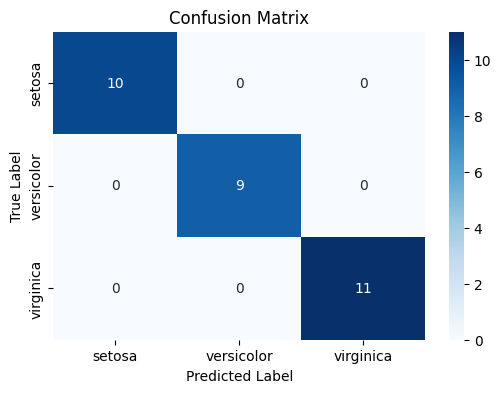

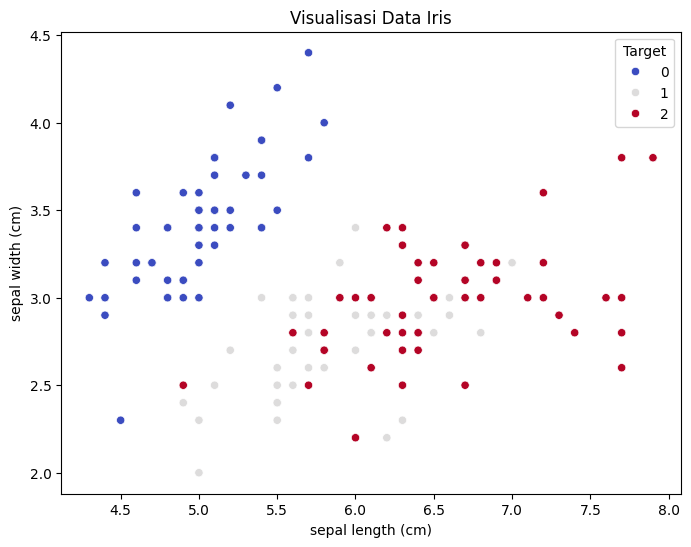

In [ ]:
#Import library yang diperlukan
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

#Memuat dataset iris dari scikit-learn
iris = datasets.load_iris()
X = iris.data  # Input (fitur) untuk machine learning
y = iris.target  # Output (label/target) yang diinginkan

#Mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=iris.feature_names)  # Kolom menggunakan nama fitur
df_y = pd.Series(y, name='target') #Kolom target dengan nama 'target'
#Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

#Tampilkan 10 baris pertama
print(df.head(10))
df.info()
print(df['target'].unique())
print(df.describe())

#Split dataset menjadi training & testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Membangun Model Logistic Regression
model = LogisticRegression(max_iter=200)  # Menambah iterasi agar model lebih stabil
model.fit(X_train, y_train)  # Melatih model

# Melakukan Prediksi
y_pred = model.predict(X_test)

#Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Membuat Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Visualisasi hasil Logistic Regression
#Scatter plot fitur pertama & kedua dengan warna sesuai target
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[iris.feature_names[0]], y=df[iris.feature_names[1]], hue=df['target'], palette="coolwarm")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Visualisasi Data Iris')
plt.legend(title='Target')
plt.show()